In [49]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('notebook', font_scale=1.3)
sns.set_style('white')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import json
EXPERIMENT = 'cogsci-1'
def load_trials(experiment):
    with open(f'data/{experiment}/trials.json') as f:
        data = json.load(f)

    for wid, trials in data.items():
        for t in trials:
            t['wid'] = wid
            yield t
            
data = pd.DataFrame(load_trials(EXPERIMENT))

In [2]:
# TODO

pdf = df = pd.read_csv('julia/real_results/participants.csv')

df['condition'] = df.apply(
    lambda row: 'Icelandic' if row.icelandic else 'Autocomplete' if row.autocomplete else 'Baseline',
    axis=1
)

In [3]:
df.condition.value_counts()

Autocomplete    26
Baseline        23
Icelandic       23
Name: condition, dtype: int64

# Stats

In [54]:
from scipy.stats import mannwhitneyu
cost = df.set_index('condition').cost

def power(x, y, N, sims=1000, alpha=0.05):
    success = np.zeros(sims)
    for i in range(sims):
        u, p = mannwhitneyu(x.sample(N, replace=True), y.sample(N, replace=True))
        success[i] = p < alpha
    return success.mean()
    
power(cost['Icelandic'], cost['Baseline'], 500)

0.124

In [86]:
from scipy.stats import mannwhitneyu
cost = df.query('n_reveal >= 8').set_index('condition').cost

def power(x, y, N, sims=1000, alpha=0.05):
    success = np.zeros(sims)
    for i in range(sims):
        u, p = mannwhitneyu(x.sample(N, replace=True), y.sample(N, replace=True))
        success[i] = p < alpha
    return success.mean()
    
power(cost['Icelandic'], cost['Baseline'], 500)

0.27

In [72]:
cost.Baseline.mean(), cost.Icelandic.mean()

(12.391304347826088, 11.73913043478261)

# Plots

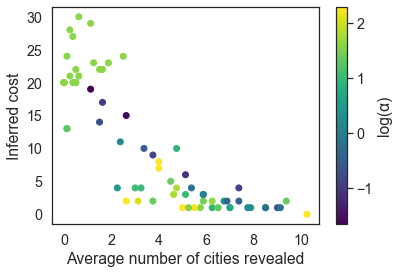

In [9]:
plt.scatter(df.n_reveal/8, df.cost, c=np.log(df.α), cmap='viridis')
plt.xlabel("Average number of cities revealed")
plt.ylabel("Inferred cost")
plt.colorbar(label='log(α)')

In [8]:
df.head()

,icelandic,wid,autocomplete,cost,α,ε,logp,difficulty,mean_rt,n_reveal,condition
0,False,w00fc5e9,False,20.0,5.000500,0.001000,-0.007276,0,NaN,0,Baseline
1,False,w03de12b,True,24.0,5.000500,0.122375,-5.440824,-1,5796.000000,1,Autocomplete
2,True,w04e764c,False,1.0,4.981634,0.497254,-100.268012,1,4319.630435,46,Icelandic
3,True,w0c105b0,False,10.0,0.617647,0.318875,-65.961152,1,6383.729958,27,Icelandic
4,True,w0cfe586,False,4.0,6.230614,0.747717,-81.599899,1,3907.973684,38,Icelandic


Text(55.46783205555556, 0.5, 'Inferred cost')

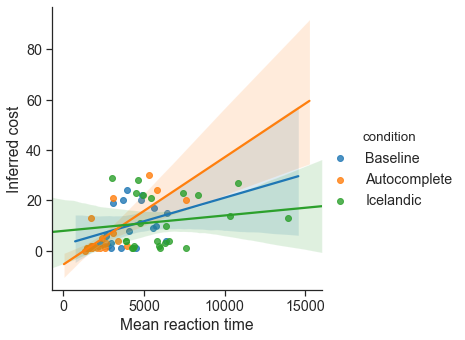

In [15]:
# plt.scatter(df.mean_rt, df.cost, color=df.difficulty)
sns.lmplot('mean_rt', 'cost', hue='condition', data=df, fit_reg=1)
plt.xlabel("Mean reaction time")
plt.ylabel("Inferred cost")
# plt.colorbar(label='log(α)')

In [18]:
def cond_plot(y, exclude=True):
    d = df.query('n_reveal >= 8') if exclude else df
    order=['Autocomplete', 'Baseline', 'Icelandic']
    sns.pointplot('condition', y, data=d,
                 order=order, alpha=0.1)
    sns.swarmplot('condition', y, data=d,
                  order=order, color='black')
    plt.savefig(f'figs/{y}.pdf')

In [28]:
df

,icelandic,wid,autocomplete,cost,α,ε,logp,difficulty,mean_rt,n_reveal,condition
0,False,w00fc5e9,False,20.0,5.000500,0.001000,-0.007276,0,NaN,0,Baseline
1,False,w03de12b,True,24.0,5.000500,0.122375,-5.440824,-1,5796.000000,1,Autocomplete
2,True,w04e764c,False,1.0,4.981634,0.497254,-100.268012,1,4319.630435,46,Icelandic
3,True,w0c105b0,False,10.0,0.617647,0.318875,-65.961152,1,6383.729958,27,Icelandic
4,True,w0cfe586,False,4.0,6.230614,0.747717,-81.599899,1,3907.973684,38,Icelandic
...,...,...,...,...,...,...,...,...,...,...,...
67,True,wed9b70f,False,1.0,2.093456,0.160804,-107.218848,1,4227.214286,56,Icelandic
68,False,wf4d7c65,True,3.0,5.984996,0.815222,-83.432818,-1,2624.611111,37,Autocomplete
69,True,wf90f4a6,False,14.0,0.494277,0.001000,-34.108986,1,10317.521102,12,Icelandic
70,False,wf9223a1,True,4.0,0.845244,0.001000,-75.032274,-1,3387.880952,43,Autocomplete


In [26]:
df.cost.value_counts()

1.0     15
20.0    10
2.0      9
4.0      6
3.0      4
22.0     3
24.0     2
23.0     2
10.0     2
13.0     2
21.0     2
5.0      1
6.0      1
29.0     1
11.0     1
17.0     1
14.0     1
30.0     1
7.0      1
19.0     1
28.0     1
27.0     1
8.0      1
15.0     1
0.0      1
9.0      1
Name: cost, dtype: int64

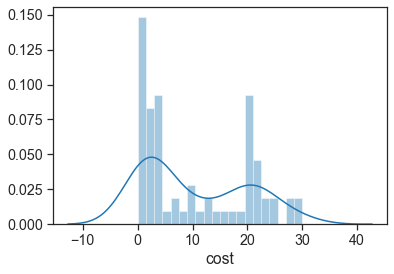

In [24]:
sns.distplot(df.cost, bins=20)

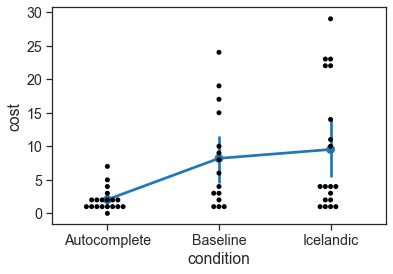

In [79]:
cond_plot('cost', exclude=True)

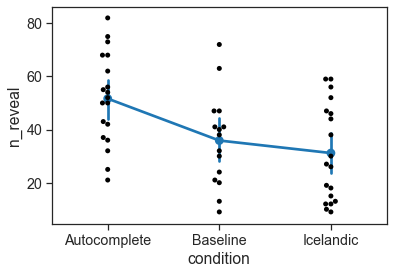

In [20]:
cond_plot('n_reveal', True)

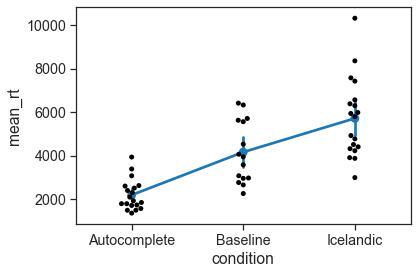

In [21]:
cond_plot('mean_rt', True)

# Likelihood breakdown

In [4]:
models = "Optimal BestFirst MetaGreedy BiasedOptimal BiasedBestFirst BiasedMetaGreedy".split()
models = "BestFirst Optimal MetaGreedy BiasedBestFirst BiasedOptimal BiasedMetaGreedy".split()

paired = sns.palettes.color_palette('Paired')
pal = dict(zip(models, [*paired[1:7:2], *paired[0:6:2]]))

In [5]:
df = pd.read_csv('julia/real_results/likelihoods.csv')
df['full_model'] = df.biased.apply(lambda x: 'Biased' if x else '') + df.model

no_click = df.query('full_model == "Optimal"').groupby(['map', 'wid']).apply(len) < 2
usually_click = no_click.groupby('wid').sum() <= 2
print(usually_click.mean())
df = df.set_index('wid').loc[usually_click]
len(df.reset_index().wid.unique())

0.5833333333333334


42

In [9]:
d = df.set_index('full_model').logp
diff = d['BiasedOptimal'] - d['BiasedBestFirst']

In [10]:
stim = df.groupby(['full_model', 'map']).logp.sum()
diff = stim['BiasedOptimal'] - stim['BiasedBestFirst']
diff

map
fantasy_map_1560976725599.png    100.928287
fantasy_map_1560976804519.png     -9.640754
fantasy_map_1560976821363.png     15.589968
fantasy_map_1560976853546.png     15.070749
fantasy_map_1560976873961.png      3.251478
fantasy_map_1560976890783.png     17.408780
fantasy_map_1560976900330.png     20.198196
fantasy_map_1560977229084.png     15.917673
Name: logp, dtype: float64

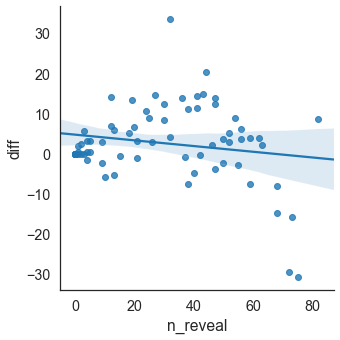

In [337]:
d = ind.set_index(['full_model', 'wid']).logp
diff = d['BiasedOptimal'] - d['BiasedBestFirst']
data = pdf.set_index('wid')[['logp', 'n_reveal', 'cost']]
data['diff'] = diff
sns.lmplot('n_reveal', 'diff', data=data)

In [12]:
ind = df.groupby(['full_model', 'wid']).logp.sum().reset_index()
n_obs = df.groupby('wid').apply(len) / len(models)
ind['avg_logp'] = list(ind.set_index('wid').logp / n_obs)

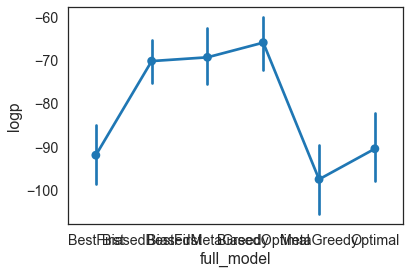

In [16]:
# sns.pointplot('full_model', 'logp', data=ind, )


In [20]:
val = 'logp'
avg = ind.set_index('full_model').loc[models].groupby('full_model')[val].mean()
plt.plot(avg.values, avg.index)

full_model
BestFirst          -91.950733
BiasedBestFirst    -70.255858
BiasedMetaGreedy   -69.388097
BiasedOptimal      -66.000516
MetaGreedy         -97.521456
Optimal            -90.470338
Name: logp, dtype: float64

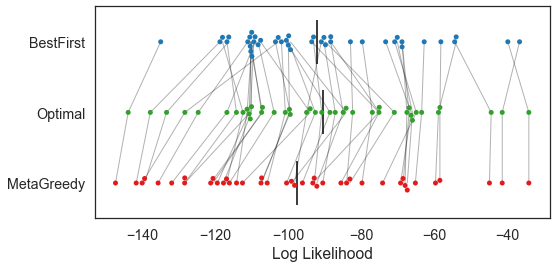

In [49]:
# horizontal orientation

def plot_line(models, d, val):
    plt.plot(models, d.set_index('full_model').loc[models][val], color='k', lw=1, alpha=0.3)

def plot_participants(val, models=models):
    plt.figure(figsize=(8,4))
    sns.swarmplot(y='full_model', x=val, data=ind, order=models, palette=pal, )
    for w, d in ind.groupby('wid'):
        plt.plot(d.set_index('full_model').loc[models][val], models, color='k', lw=1, alpha=0.3)
#     plt.plot(ind.set_index('full_model').loc[models][val])
    avg = ind.set_index('full_model').loc[models].groupby('full_model')[val].mean()
    plt.scatter(avg.values, avg.index, s=2000, marker='|', c='k')
    plt.ylabel('')
    plt.xlabel('Log Likelihood')

plot_participants('logp', models=models[:3])
plt.tight_layout()
plt.savefig('individual_likelihood_nobias.pdf')

In [44]:
alt_models = models[::3] + models[1::3] + models[2::3]

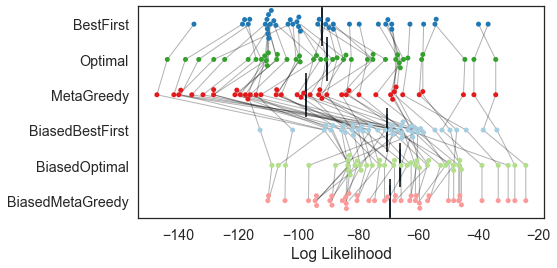

In [48]:
plot_participants('logp', models=models)
plt.tight_layout()
plt.savefig('individual_likelihood.pdf')

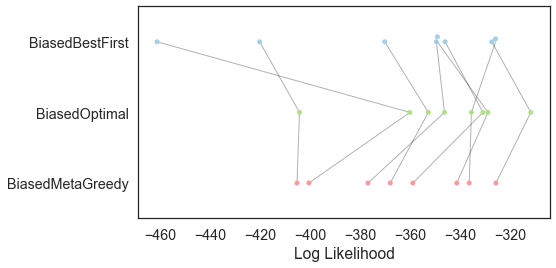

In [53]:
stim = df.groupby(['full_model', 'map']).logp.sum().reset_index()

def plot_participants(val, models=models):
    plt.figure(figsize=(8,4))
    sns.swarmplot(y='full_model', x=val, data=stim, order=models, palette=pal, )
    for w, d in stim.groupby('map'):
        plt.plot(d.set_index('full_model').loc[models][val], models, color='k', lw=1, alpha=0.3)
#     plt.plot(stim.set_index('full_model').loc[models][val])
#     avg = stim.set_index('full_model').loc[models].groupby('full_model')[val].mean()
#     plt.scatter(avg.values, avg.index, s=2000, marker='|', c='k')
    plt.ylabel('')
    plt.xlabel('Log Likelihood')
        
plot_participants('logp', models=models[3:])
plt.tight_layout()
plt.savefig('map_likelihood.pdf')

# Termination

In [34]:
maps = pd.read_csv(f'model/results/{EXPERIMENT}/maps.csv').set_index('map')
maps

,shortest_path,n_node
map,,
cogsci-constant,3,12


In [59]:


def load_data(name):
    df = pd.read_csv(f'model/results/{EXPERIMENT}/features/{name}.csv')
    df['etr'] = df.term_reward
#     df['ntr'] = (df.set_index('map').term_reward / maps.shortest_path).values
#     df['etr'] = pd.cut(df.ntr, list(range(-75,  -24, 10)))
    return df

agents = ['Human', 'Optimal-Biased', 'BestFirst-Biased']
#     ('Human', 'Human'),
#     ('Optimal-Biased', 'Optimal'),
#     ('BestFirst-Biased', 'BestFirst')
# ]

def load_all():
    for name in agents:
        df = load_data(name)
        df['agent'] = name
        yield df

df = pd.concat(load_all())

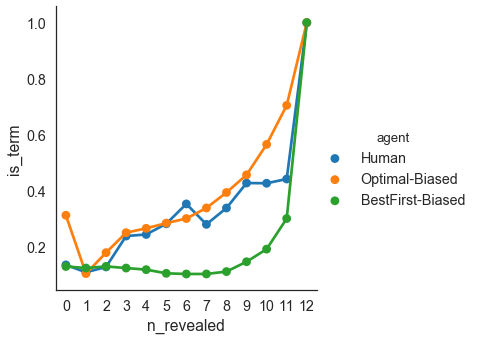

In [52]:
sns.catplot('n_revealed', 'is_term', data=df, kind='point', ci=False, hue='agent')

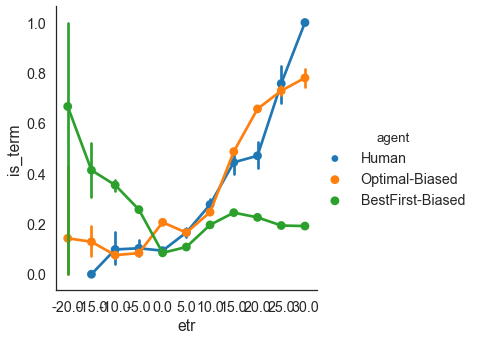

In [60]:
sns.catplot('etr', 'is_term', data=df, kind='point', hue='agent')

Text(54.89961625694444, 0.5, 'Termination Probability')

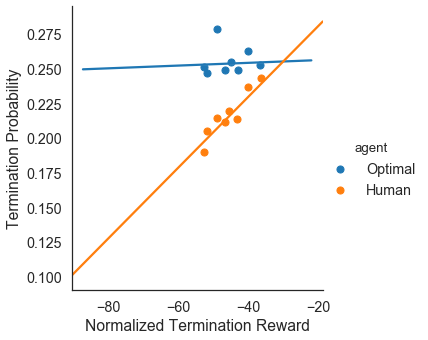

In [222]:
sns.lmplot('ntr', 'is_term', data=df, logistic=False, x_bins=10, hue='agent', ci=False)
plt.xlabel('Normalized Termination Reward')
plt.ylabel("Termination Probability")

In [67]:
# X = df.groupby(['etr', 'n_revealed']).is_term.apply(robust_mean).unstack()
X.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='n_revealed')

In [75]:
X

n_revealed,0,1,2,3,4,5,6,7,8,9,10,11,12
etr,,,,,,,,,,,,,
-20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.250000,0.000000,1.0
-15.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.071429,0.159091,0.214286,0.170213,0.320000,1.0
-10.0,NaN,NaN,NaN,0.257426,0.170103,0.182927,0.162587,0.171429,0.156909,0.257310,0.373272,0.481752,1.0
-5.0,NaN,NaN,NaN,0.115778,0.146667,0.133837,0.137291,0.134297,0.172037,0.247287,0.357298,0.453704,1.0
0.0,0.220248,0.048794,0.032806,0.056869,0.053806,0.051852,0.062349,0.088620,0.133623,0.177230,0.249256,0.411765,1.0
5.0,NaN,0.134328,0.108760,0.100718,0.087772,0.087555,0.106410,0.125989,0.160146,0.203813,0.253837,0.376108,1.0
10.0,NaN,0.228434,0.207298,0.204473,0.182048,0.169737,0.166090,0.166193,0.179418,0.198497,0.242195,0.337134,1.0
15.0,NaN,NaN,0.412209,0.376680,0.342372,0.304447,0.265572,0.242536,0.209406,0.210898,0.233010,0.314105,1.0
20.0,NaN,NaN,0.545227,0.466948,0.402141,0.327133,0.261849,0.219186,0.195671,0.185232,0.206564,0.278707,1.0


([], <a list of 0 Text yticklabel objects>)

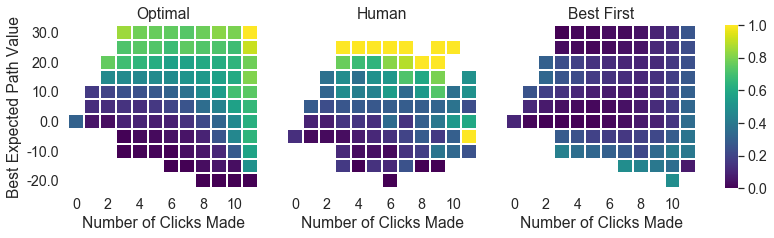

In [82]:
# x = df.groupby(['etr', 'n_revealed']).is_term.mean().reset_index()
def robust_mean(x):
    return np.mean(x)
    if len(x) < 5:
        return np.nan
    return np.mean(x)

lims = {
    'cogsci-1': {
        'x': (0, 12),
        'y': (0, 11)
    }
#     plt.ylim(-0.5, 5.5)
#     plt.xlim(1, 11)
}[EXPERIMENT]

def plot_adaptive(df, **kws):
    X = df.groupby(['etr', 'n_revealed']).is_term.apply(robust_mean).unstack()
    # X = df.groupby(['etr', 'n_revealed']).apply(len).unstack()
    sns.heatmap(X, cmap='viridis', linewidths=1, **kws).invert_yaxis()
    plt.xlabel('Number of Clicks Made')
    plt.ylim(*lims['y'])
    plt.xlim(*lims['x'])

    
fig, axes = plt.subplots(1, 4, figsize=(12, 3),
                         gridspec_kw={'width_ratios': [15, 15, 15, 1]})

# fig, axes = plt.subplots(1, 2, figsize=(8,4))

plt.sca(axes[0])
plot_adaptive(df.query('agent == "Optimal-Biased"'), cbar_ax=axes[3])
plt.ylabel("Best Expected Path Value")
plt.title("Optimal")

plt.sca(axes[1])
plot_adaptive(df.query('agent == "Human"'), cbar=False)
plt.title("Human")
plt.ylabel("")
plt.yticks(())

plt.sca(axes[2])
plot_adaptive(df.query('agent == "BestFirst-Biased"'), cbar=False)
plt.title("Best First")
plt.ylabel("")
plt.yticks(())


# Scratch

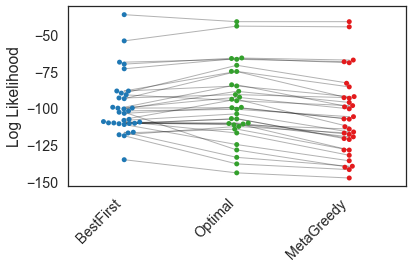

In [286]:
def plot_line(models, d, val):
    plt.plot(models, d.set_index('full_model').loc[models][val], color='k', lw=1, alpha=0.3)

def plot_participants(val, models=models):
    ax = sns.swarmplot('full_model', val, data=ind, order=models, palette=pal)
    for w, d in ind.groupby('wid'):
        plot_line(models, d, val)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.xlabel('')
    plt.ylabel('Log Likelihood')
#         plot_line(models[:3], d, val)
#         plot_line(models[3:], d, val)
        
plot_participants('logp', models=models[:3])
plt.tight_layout()
plt.savefig('individual_likelihood_nobias.pdf')

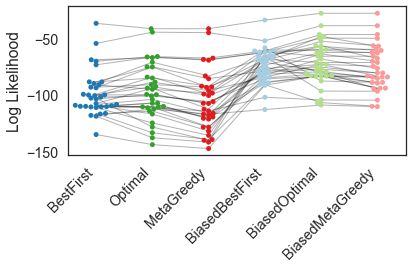

In [287]:
plot_participants('logp', models=models)
plt.tight_layout()
plt.savefig('individual_likelihood.pdf')